In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Emincan\Desktop\ML-Projects\datasets-master-a6fa39d2490c3afd5b5eb24b6f250c13fe8b4f5a\Abalone\abalone.data.csv' , header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.rename(columns={0:'Sex' , 1:'Length' , 2:'Diameter' , 3:'Height' , 4:'WholeWeight' , 5:'ShuckedWeight' , 6:'VisceraWeight' , 7:'ShellWeight' ,8 : 'Age'} , inplace=True)
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Age            4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [6]:
df.nunique()

Sex                 3
Length            134
Diameter          111
Height             51
WholeWeight      2429
ShuckedWeight    1515
VisceraWeight     880
ShellWeight       926
Age                28
dtype: int64

In [7]:
#Converting Sex colmnn into categorical factors as they contain unqiue values
category_column_names = ['Sex']
continous_column_names = []

for i in df.columns:
    if i not in category_column_names:
        continous_column_names.append(i)

print("Categorical Columns : ",category_column_names)
print()
print("Continous Columns : ",continous_column_names)

Categorical Columns :  ['Sex']

Continous Columns :  ['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Age']


In [8]:
df = pd.get_dummies(df)
df.head()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


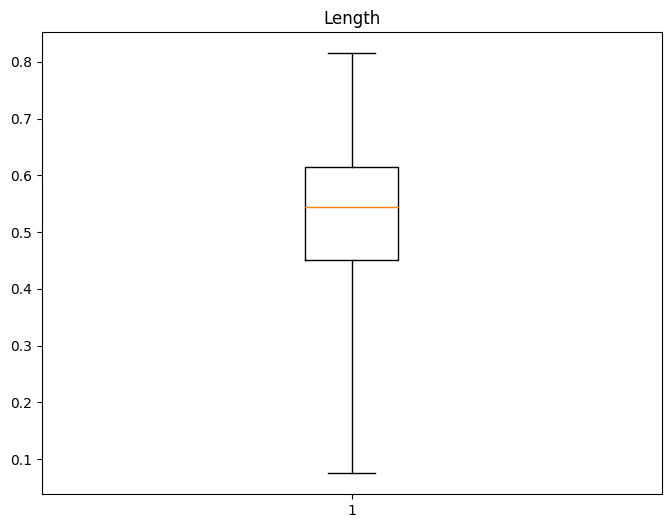

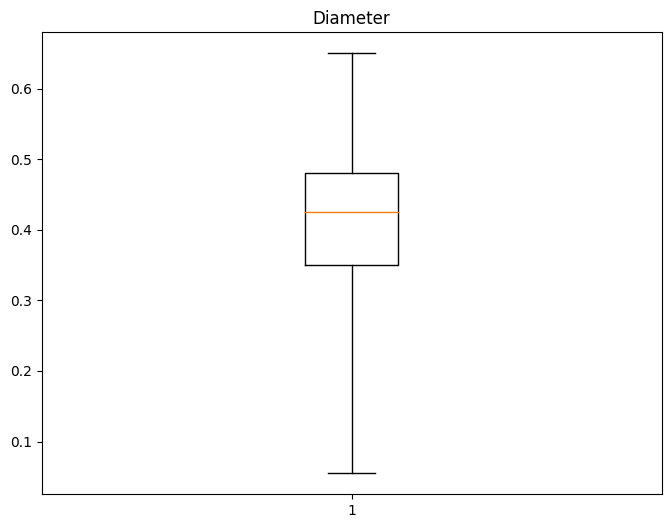

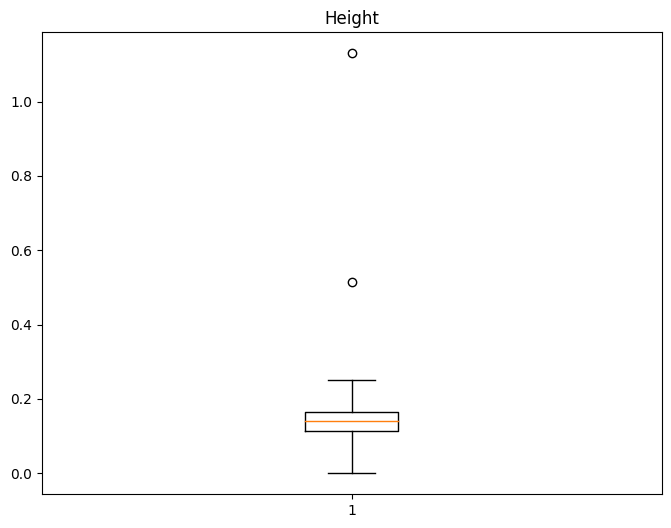

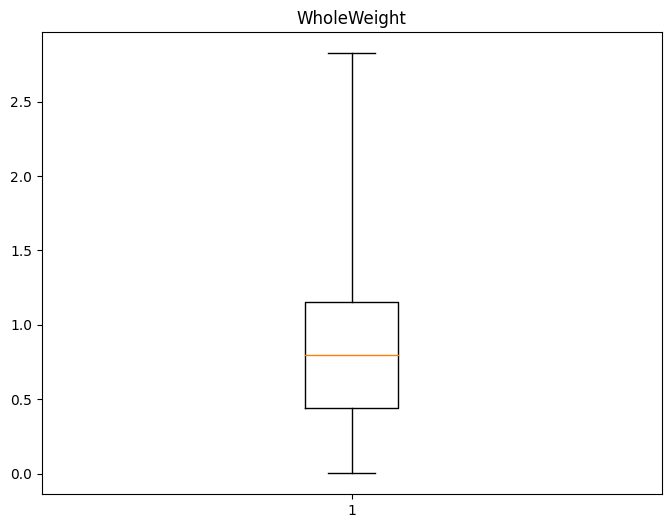

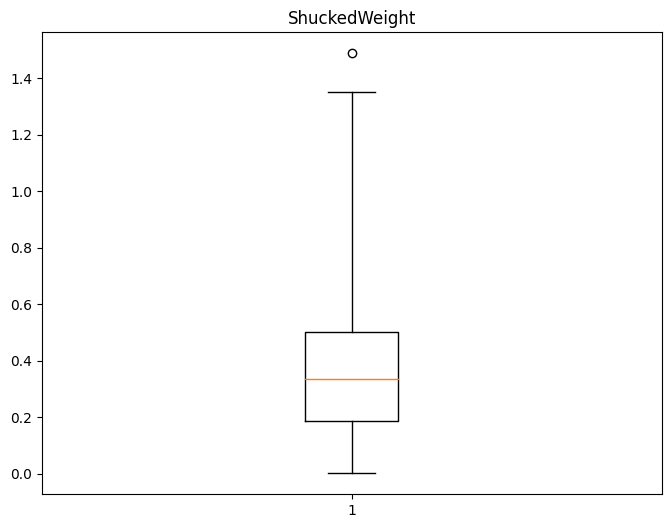

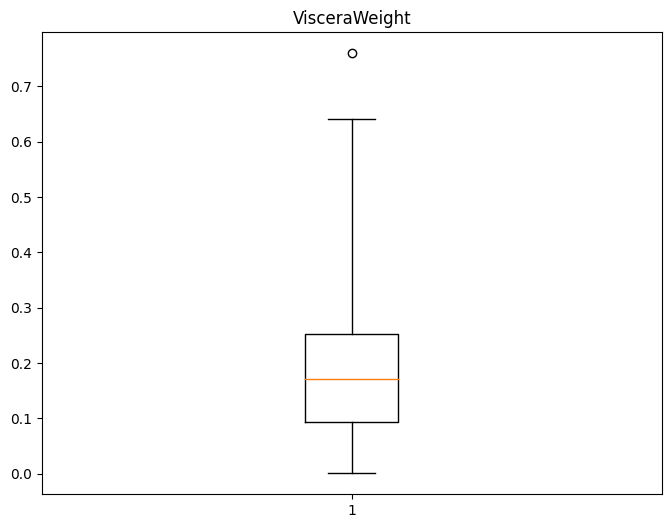

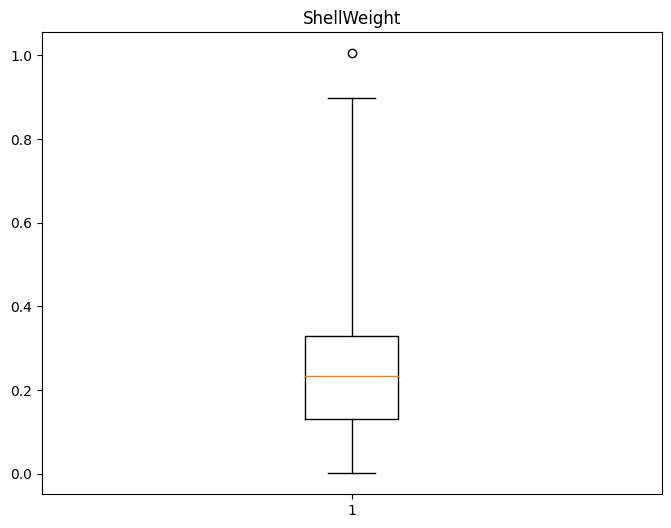

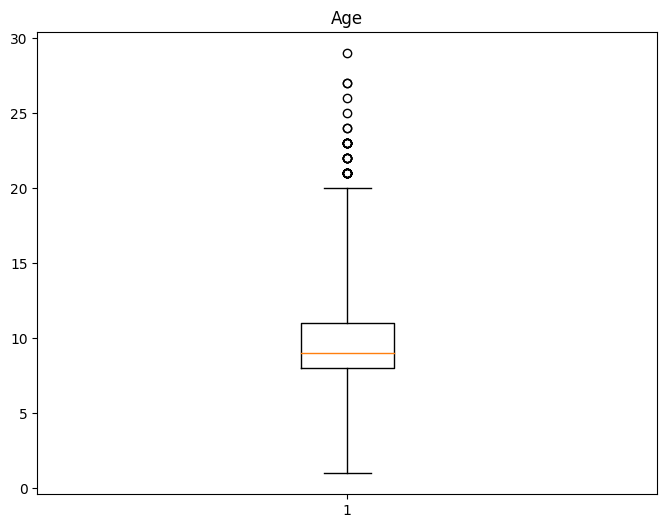

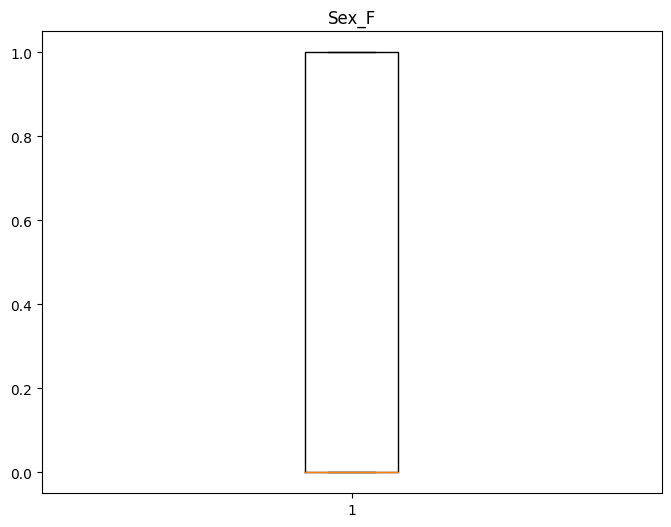

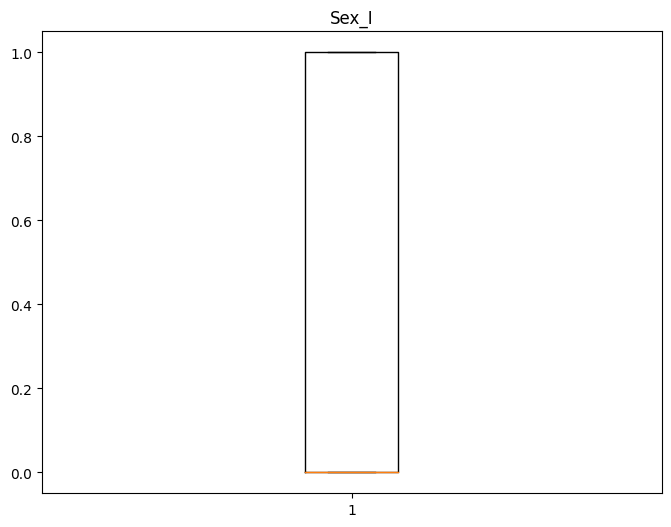

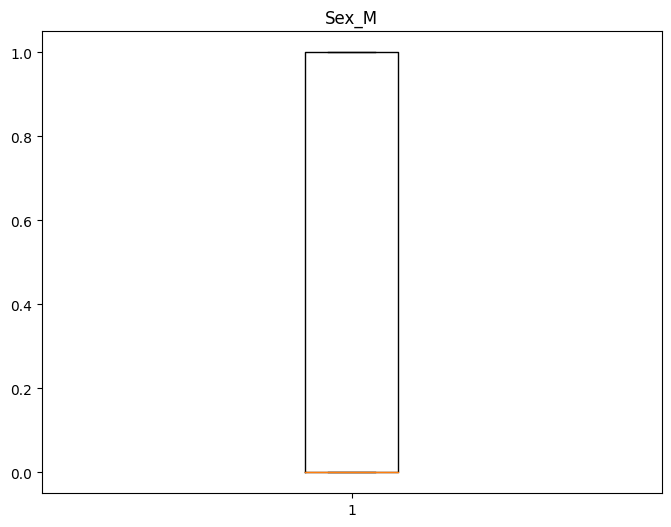

In [9]:
import matplotlib.pyplot as plt

# df veri çerçevesindeki her sütun için boxplot oluşturma
for col in df.columns:
    plt.figure(figsize=(8,6))
    plt.boxplot(df[col] , whis = 3)
    plt.title(col)
    plt.show()

In [10]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df['Sex'] = le.fit_transform(df['Sex'].values)

In [10]:
df.head()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
WholeWeight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
ShuckedWeight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
VisceraWeight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
ShellWeight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Age,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000
Sex_F,4177.0,0.312904,0.463731,0.0000,0.0000,0.0000,1.000,1.0000
Sex_I,4177.0,0.321283,0.467025,0.0000,0.0000,0.0000,1.000,1.0000


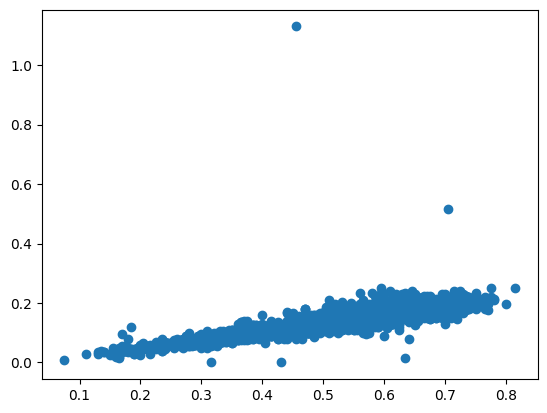

In [12]:
plt.scatter(x=df['Length'] , y = df['Height']);

In [13]:
df[(df['Length'] > 0.65) & (df['Height'] > 0.4)] # 1417

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Age,Sex_F,Sex_I,Sex_M
1417,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10,0,0,1


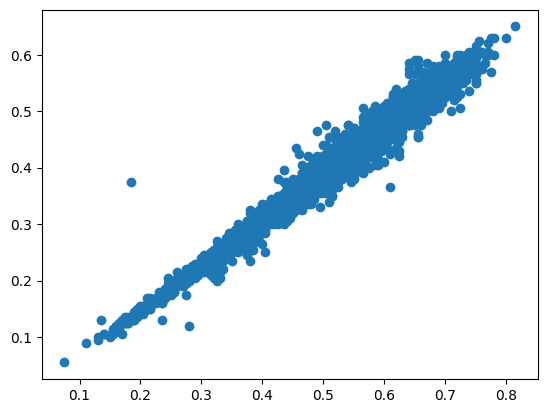

In [14]:
plt.scatter(x=df['Length'] , y = df['Diameter']);

In [15]:
df[(df['Length'] < 0.2 ) & (df['Diameter'] > 0.3)] # 1210

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Age,Sex_F,Sex_I,Sex_M
1210,0.185,0.375,0.12,0.4645,0.196,0.1045,0.15,6,0,1,0


<Axes: xlabel='Sex_I', ylabel='Length'>

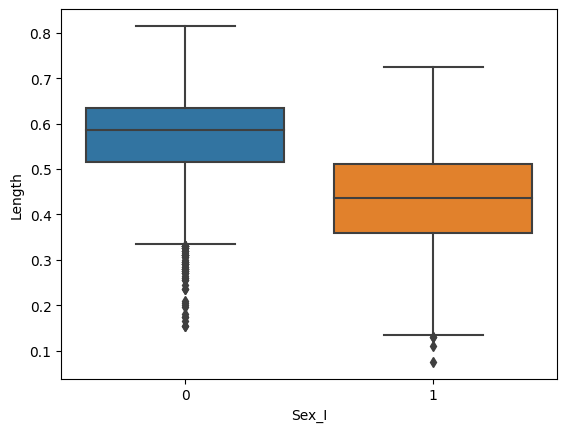

In [16]:
sns.boxplot(x = df['Sex_I'] , y = df['Length'])

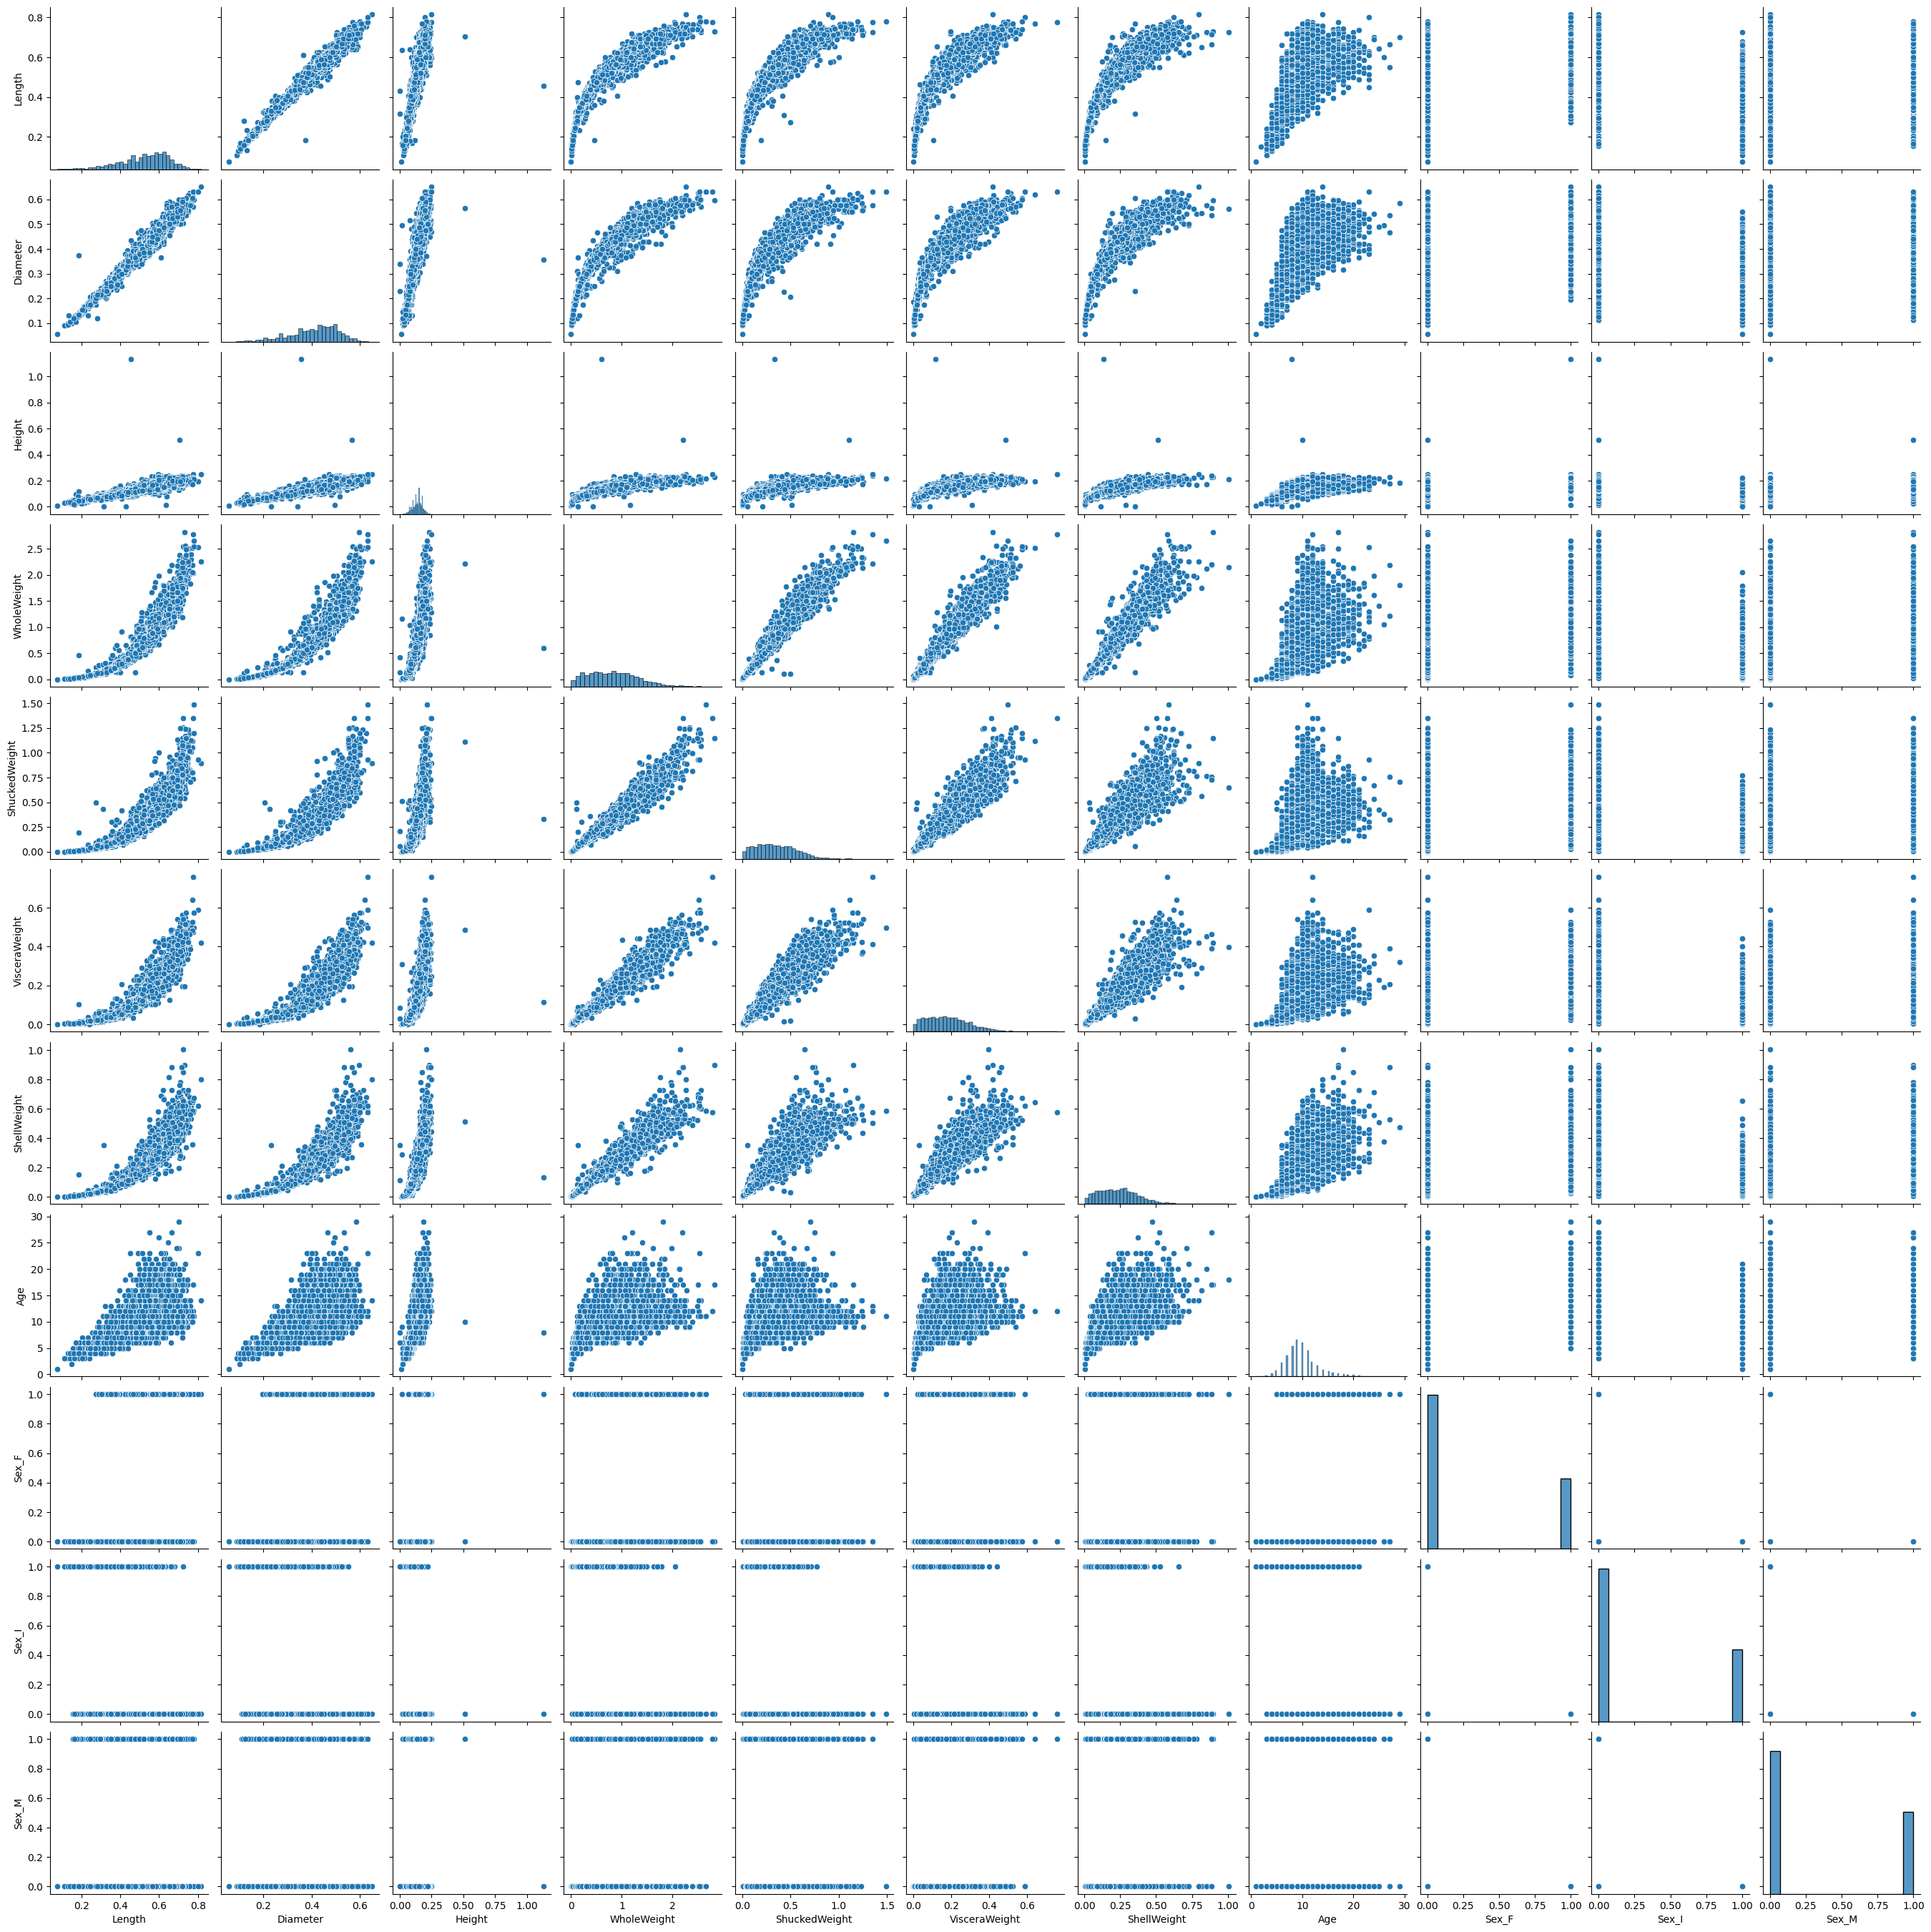

In [17]:
sns.pairplot(df);

In [18]:
outlier_idx = []
outlier_idx.append(df[df['Height'] > 1].index) # 2051
outlier_idx.append(df[(df['Length'] > 0.65) & (df['Height'] > 0.4)].index) # 1417
outlier_idx.append(df[(df['Length'] < 0.2 ) & (df['Diameter'] > 0.3)].index) # 1210

In [20]:
# for idx in outlier_idx:
#     df.drop(idx , inplace=True)

In [19]:
df.size

45947

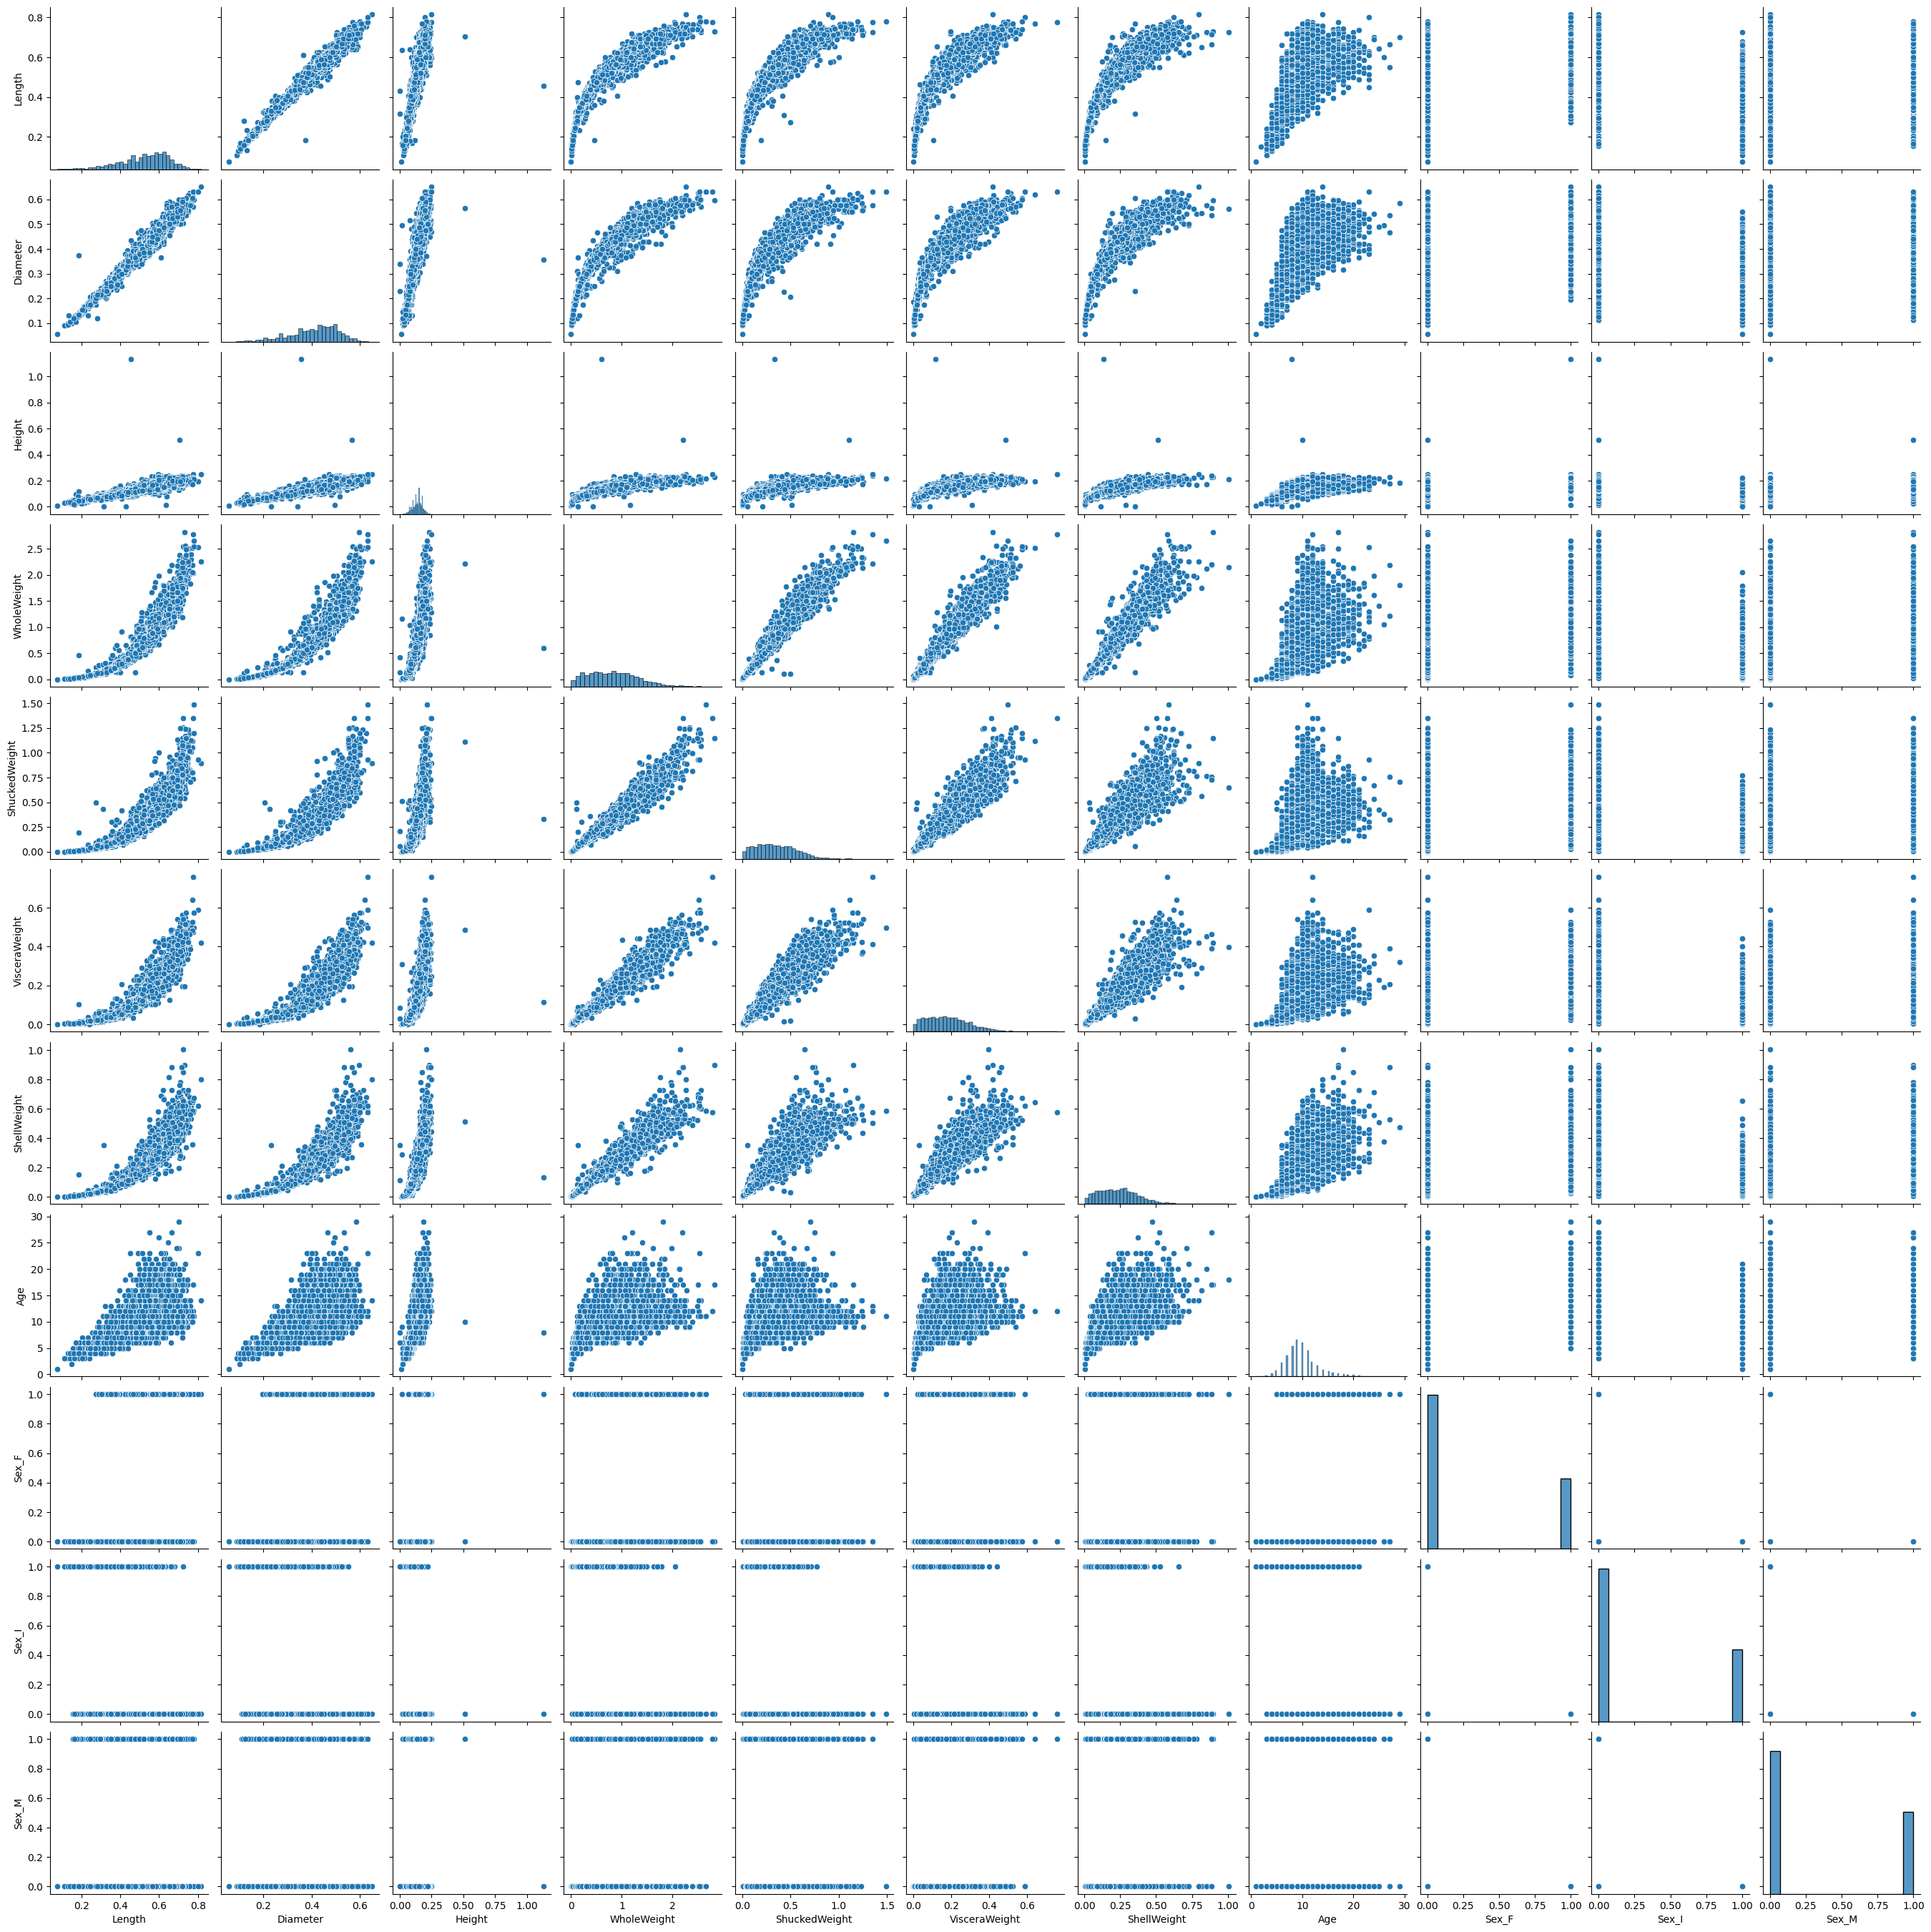

In [20]:
sns.pairplot(df);

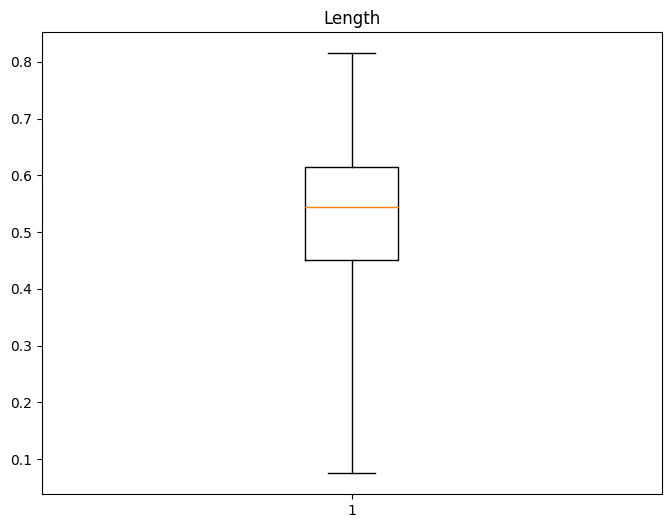

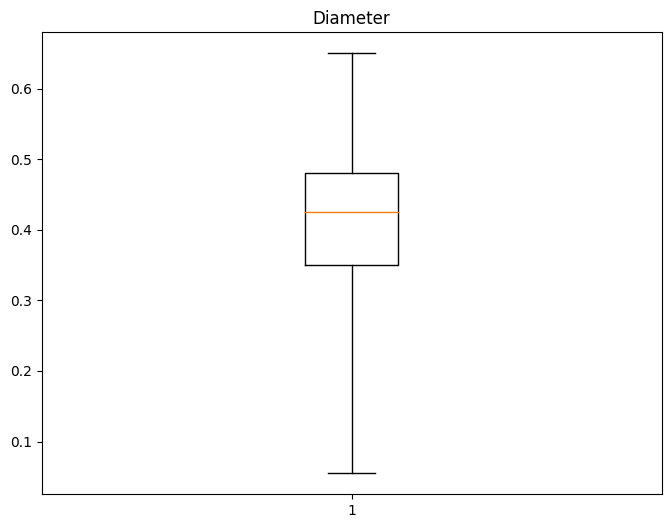

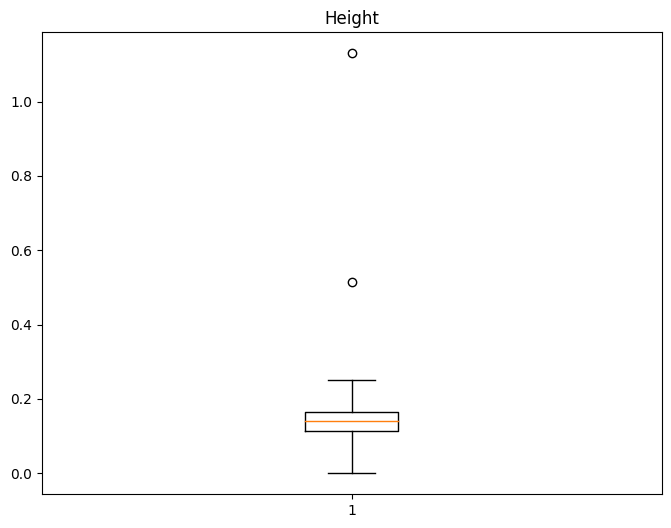

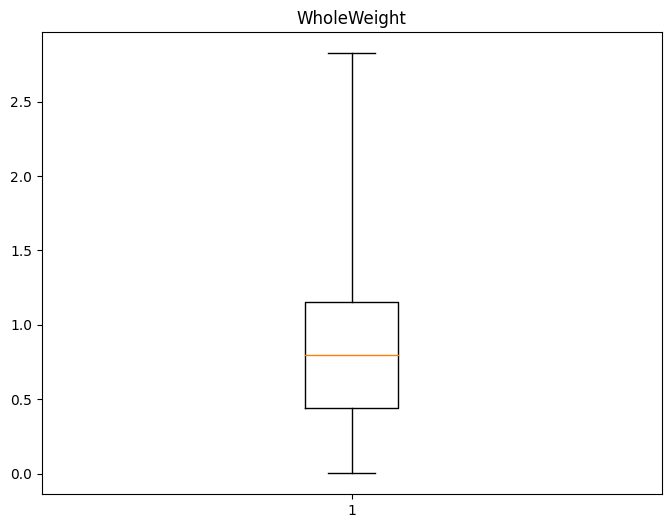

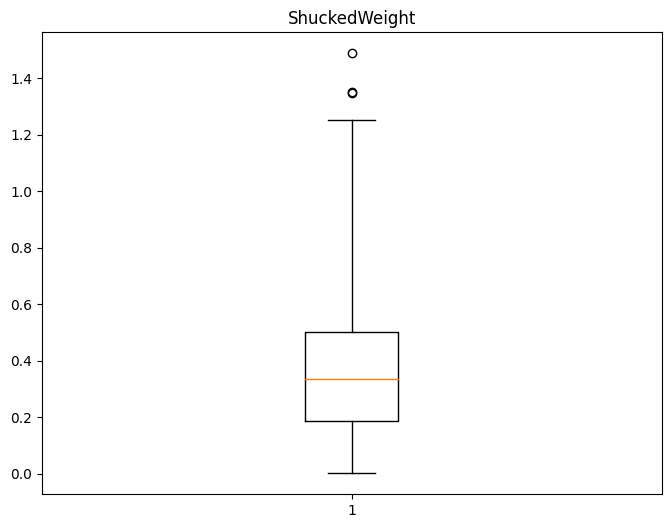

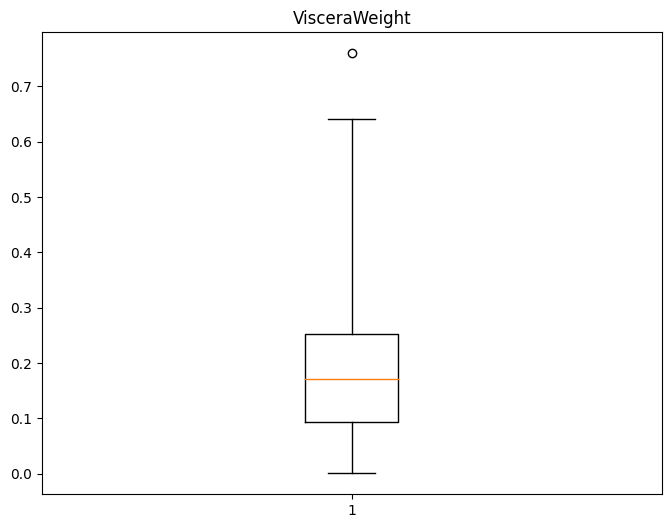

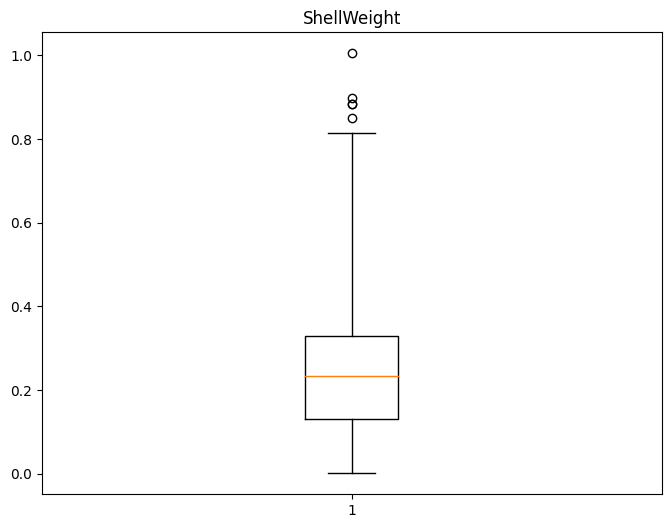

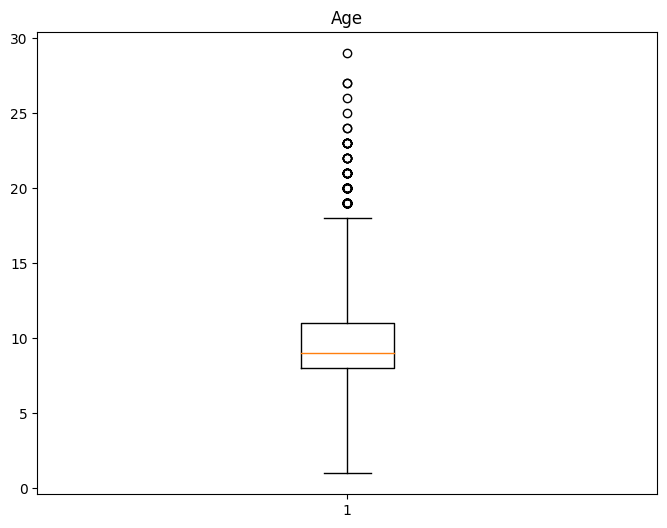

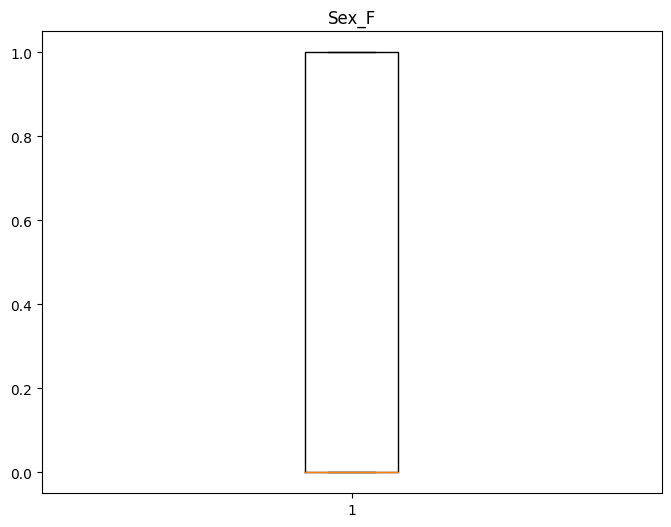

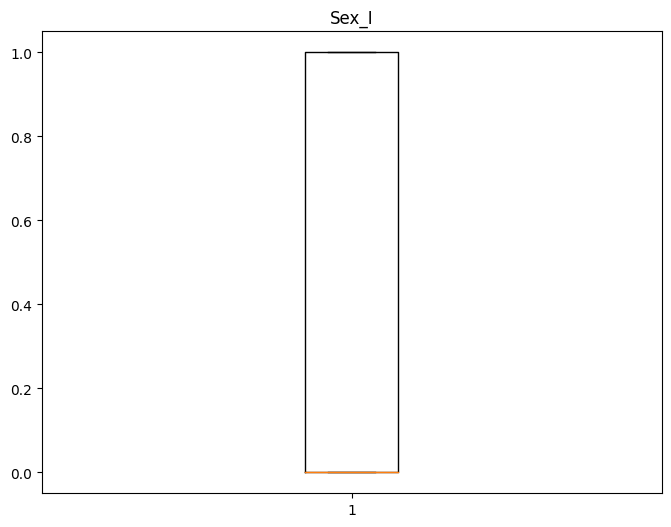

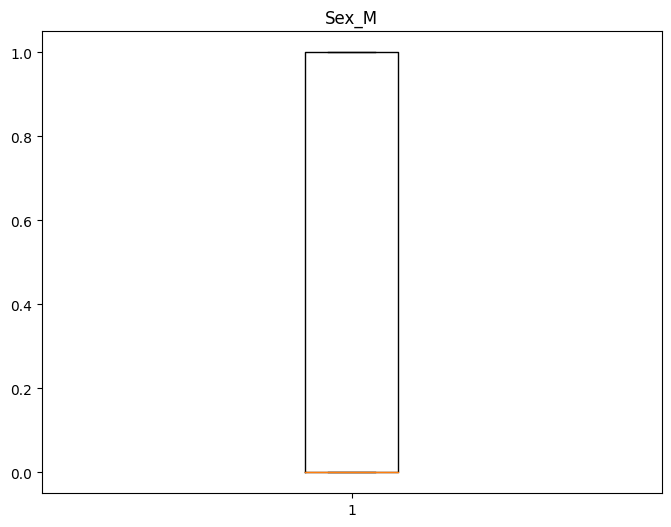

In [22]:
import matplotlib.pyplot as plt

# df veri çerçevesindeki her sütun için boxplot oluşturma
for col in df.columns:
    plt.figure(figsize=(8,6))
    plt.boxplot(df[col] , whis = 2.5)
    plt.title(col)
    plt.show()

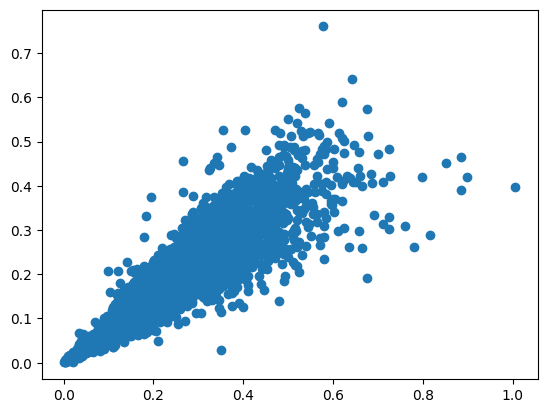

In [23]:
plt.scatter(x=df['ShellWeight'] , y = df['VisceraWeight']);

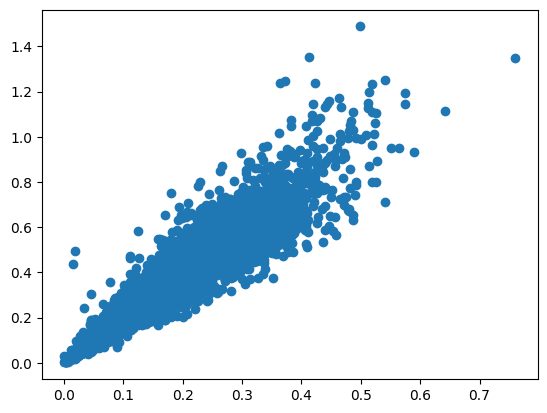

In [24]:
plt.scatter(x=df['VisceraWeight'] , y = df['ShuckedWeight']);

In [25]:
df[(df['ShellWeight'] < 0.6) & (df['VisceraWeight'] > 0.7)] # 1763
df[(df['ShellWeight'] > 0.9) & (df['VisceraWeight'] < 0.4)] # 163
df[(df['VisceraWeight'] < 0.5) & (df['ShuckedWeight'] > 1.4)] # 1209

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Age,Sex_F,Sex_I,Sex_M
1209,0.78,0.63,0.215,2.657,1.488,0.4985,0.586,11,1,0,0


In [26]:
outlier_idx.append(df[(df['ShellWeight'] < 0.6) & (df['VisceraWeight'] > 0.7)].index) # 1763
outlier_idx.append(df[(df['ShellWeight'] > 0.9) & (df['VisceraWeight'] < 0.4)].index) # 163
outlier_idx.append(df[(df['VisceraWeight'] < 0.5) & (df['ShuckedWeight'] > 1.4)].index) # 1209

In [27]:
for idx in outlier_idx:
    df.drop(idx , inplace=True)

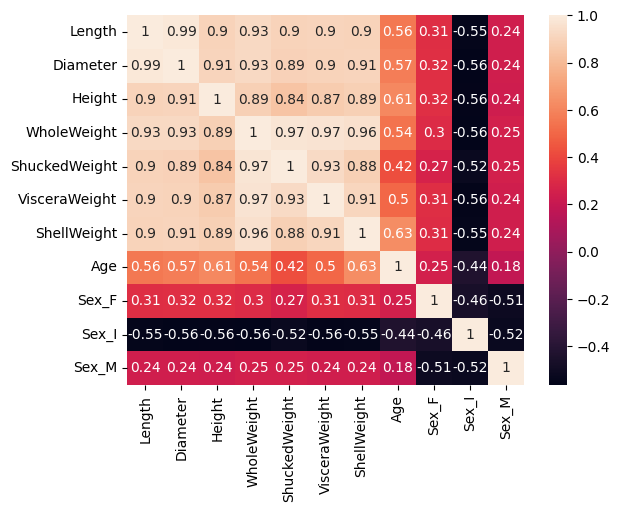

In [28]:
sns.heatmap(df.corr() , annot = True);

### PCA

In [ ]:
# #Get the target variable
# target = df['Age']

In [ ]:
# df.shape

In [ ]:
# #Import library for PCA
# from sklearn.decomposition import PCA

# #Converting data to numpy array
# X = df.drop('Age' , axis = 1).values

# # Data has 116 variables so no of components of PCA = 115
# pca = PCA(n_components=10)
# pca.fit(X)

# # Proportion of variance explained
# variance_explained = pca.explained_variance_ratio_

# # Cumulative scree plot
# var1 = np.cumsum(np.round(variance_explained, decimals=4)*100)

# #Draw the plot
# plt.plot(var1)
# plt.show()

In [ ]:
# from sklearn.model_selection import  train_test_split

# #Selecting 4 components since it explains almost 95+ % data variance
# pca = PCA(n_components=6)

# #Fitting the selected components to the data
# pca.fit(X)

# #Splitting data into train and test data
# X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state = 1)

# Modelling

### Train | Test Split

In [29]:
from sklearn.model_selection import  train_test_split

In [30]:
df.head()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [31]:
df.columns

Index(['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight',
       'VisceraWeight', 'ShellWeight', 'Age', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [33]:
X = df.drop('Age' , axis = 1).values
# X = df[['Sex_F' , 'Sex_I' , 'Sex_M' , 'Height' , 'Length']]
y = df['Age']

In [34]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state=53)

### Eval Metric

In [35]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [36]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

### Compare Metrics

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
              
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

### Linear Model Building

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
lr_train_pred = lr.predict(X_train)
lr_pred = lr.predict(X_test)
eval_metric(y_test , lr_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.5598227520835815
MAE 		: 1.595808383233533
MSE 		: 4.817120251684131
RMSE 		: 2.194793897313397


In [41]:
lr_df = train_val(y_train , lr_train_pred , y_test , lr_pred , 'LinearReg' )
lr_df

,LinearReg_train,LinearReg_test
R2,0.539315,0.559823
mae,1.570912,1.595808
mse,4.720423,4.817120
rmse,2.172654,2.194794


### Ridge Model Building

In [42]:
from sklearn.linear_model import RidgeCV

In [43]:
rd = RidgeCV(alphas=np.arange(0.01,2,0.1) , scoring='neg_mean_squared_error' , cv = 3)
rd.fit(X,y)

RidgeCV(alphas=array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01,
       1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91]),
        cv=3, scoring='neg_mean_squared_error')

In [44]:
rd.best_score_

-4.92466126798045

In [45]:
rd.alpha_

0.01

In [46]:
rd_train_pred = rd.predict(X_train)
rd_pred = rd.predict(X_test)
eval_metric(y_test , rd_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.5637153949065177
MAE 		: 1.590446755863064
MSE 		: 4.774520756449659
RMSE 		: 2.185067677773313


In [47]:
rd_df = train_val(y_train , rd_train_pred , y_test , rd_pred , 'RidgeReg' )
rd_df

,RidgeReg_train,RidgeReg_test
R2,0.539023,0.563715
mae,1.566970,1.590447
mse,4.723414,4.774521
rmse,2.173342,2.185068


In [48]:
all_df = pd.concat([lr_df , rd_df] , axis = 1)
all_df

,LinearReg_train,LinearReg_test,RidgeReg_train,RidgeReg_test
R2,0.539315,0.559823,0.539023,0.563715
mae,1.570912,1.595808,1.566970,1.590447
mse,4.720423,4.817120,4.723414,4.774521
rmse,2.172654,2.194794,2.173342,2.185068


### Lasso Model Building

In [49]:
from sklearn.linear_model import LassoCV

In [53]:
lasso = LassoCV(eps=0.001 , n_alphas=100, alphas=np.arange(0.001,2,0.1) , cv = 3 , max_iter=1000000) 
lasso.fit(X_train , y_train)

LassoCV(alphas=array([1.000e-03, 1.010e-01, 2.010e-01, 3.010e-01, 4.010e-01, 5.010e-01,
       6.010e-01, 7.010e-01, 8.010e-01, 9.010e-01, 1.001e+00, 1.101e+00,
       1.201e+00, 1.301e+00, 1.401e+00, 1.501e+00, 1.601e+00, 1.701e+00,
       1.801e+00, 1.901e+00]),
        cv=3, max_iter=1000000)

In [54]:
lasso.alpha_

0.001

In [55]:
lasso.coef_

array([  0.        ,   8.41369557,  20.41673347,   9.00758103,
       -20.02753718, -10.34237243,   7.70159187,   0.        ,
        -0.84348848,   0.02703488])

In [56]:
print(lasso.score(X_train , y_train))

0.5388450804974598


In [57]:
lasso.score(X_test , y_test)

0.5624882641093012

In [58]:
lasso_train_pred = lasso.predict(X_train)
lasso_pred = lasso.predict(X_test)
eval_metric(y_test , lasso_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.5624882641093012
MAE 		: 1.5946026274120075
MSE 		: 4.78794997534436
RMSE 		: 2.188138472616475


In [59]:
lasso_df = train_val(y_train , lasso_train_pred , y_test , lasso_pred , 'LassoReg' )
lasso_df

,LassoReg_train,LassoReg_test
R2,0.538845,0.562488
mae,1.570268,1.594603
mse,4.725235,4.787950
rmse,2.173761,2.188138


In [60]:
all_df = pd.concat([all_df, lasso_df] , axis = 1)
all_df

,LinearReg_train,LinearReg_test,RidgeReg_train,RidgeReg_test,LassoReg_train,LassoReg_test
R2,0.539315,0.559823,0.539023,0.563715,0.538845,0.562488
mae,1.570912,1.595808,1.566970,1.590447,1.570268,1.594603
mse,4.720423,4.817120,4.723414,4.774521,4.725235,4.787950
rmse,2.172654,2.194794,2.173342,2.185068,2.173761,2.188138


### Decision Tree Model Building

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
dt = DecisionTreeRegressor()

params = {'max_depth': np.append(np.arange(2, 20), None) , 
          'min_samples_split': np.arange(2,15)}

random_dt = RandomizedSearchCV(dt ,params , scoring = 'neg_mean_squared_error' , cv = 3 , n_iter=30 )
random_dt.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=30,
                   param_distributions={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       None], dtype=object),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
                   scoring='neg_mean_squared_error')

In [69]:
random_dt.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_split=8)

In [70]:
random_dt.best_params_

{'min_samples_split': 8, 'max_depth': 5}

In [71]:
random_dt.score(X_train , y_train)

-4.693355044846152

In [72]:
random_dt.score(X_test , y_test)

-5.892815034669969

In [73]:
dt = DecisionTreeRegressor(min_samples_split=8 ,max_depth=5)
dt.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=8)

In [74]:
dt_train_pred = lasso.predict(X_train)
dt_pred = lasso.predict(X_test)
eval_metric(y_test , dt_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.5624882641093012
MAE 		: 1.5946026274120075
MSE 		: 4.78794997534436
RMSE 		: 2.188138472616475


In [75]:
dt_df = train_val(y_train , dt_train_pred , y_test , dt_pred , 'DecisionTree' )
dt_df

,DecisionTree_train,DecisionTree_test
R2,0.538845,0.562488
mae,1.570268,1.594603
mse,4.725235,4.787950
rmse,2.173761,2.188138


In [76]:
all_df = pd.concat([all_df,  dt_df] , axis = 1)
all_df

,LinearReg_train,LinearReg_test,RidgeReg_train,RidgeReg_test,LassoReg_train,LassoReg_test,DecisionTree_train,DecisionTree_test
R2,0.539315,0.559823,0.539023,0.563715,0.538845,0.562488,0.538845,0.562488
mae,1.570912,1.595808,1.566970,1.590447,1.570268,1.594603,1.570268,1.594603
mse,4.720423,4.817120,4.723414,4.774521,4.725235,4.787950,4.725235,4.787950
rmse,2.172654,2.194794,2.173342,2.185068,2.173761,2.188138,2.173761,2.188138


### RandomForest Model Building

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
rd = RandomForestRegressor()

params = {'n_estimators':np.arange(10,300) , 'max_depth' : np.arange(1,10) , 'min_samples_split' :np.arange(2,5)}

random_rd = RandomizedSearchCV(rd , params , scoring='neg_mean_squared_error' , cv = 3 , n_iter=30) 
rd.fit(X_train , y_train)
rd.score(X_train , y_train)

0.9377285960181788

In [79]:
rd.score(X_test , y_test)

0.5390898919889606

### GradientBoosting Model Building

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
gb = GradientBoostingRegressor()

gb.fit(X_train , y_train)
gb.score(X_train,y_train)

0.6599976963039146

In [82]:
gb.score(X_test,y_test)

0.561507261951333

### XGBoost Model Building

In [83]:
from xgboost import XGBRegressor

In [84]:
xgb = XGBRegressor()
xgb.fit(X_train , y_train)
xgb.score(X_train , y_train)

0.9504003212242604

In [85]:
xgb.score(X_test, y_test)

0.48167380762318557

In [ ]:
# RandomForest , GB and XGB overfit. Other models is almost same. 
# We need to do something more about preprocessing data but its enough now.

In [ ]:
# Done.